In [6]:
import pandas as pd

In [7]:
raw_dataset = pd.read_csv('./matrix.csv')
dataset = raw_dataset.copy()
dataset.tail()

,Unnamed: 0,초시계,수호 천사,추적자의 팔목 보호대,존야의 모래시계,월식,악마의 포옹,얼어붙은 심장,필멸자의 운명,스테락의 도전,...,BEFORE_TOP,BEFORE_BOTTOM,BEFORE_MIDDLE,BEFORE_JUNGLE,BEFORE_UTILITY,TOP,BOTTOM,MIDDLE,JUNGLE,UTILITY
1,12.18,0,0,0,0,0,0,0,0,0,...,17.8,19.2,15.5,23.6,23.9,15.3,22.4,18.1,23.5,20.7
2,12.19,0,0,0,0,0,0,0,0,0,...,15.3,22.4,18.1,23.5,20.7,15.6,21.3,18.3,26.8,18.0
3,12.20,0,0,0,0,0,0,0,1,1,...,15.6,21.3,18.3,26.8,18.0,15.0,20.0,19.5,26.1,19.4
4,12.21,0,0,0,0,0,0,0,0,0,...,15.0,20.0,19.5,26.1,19.4,15.6,19.9,19.2,24.9,20.5
5,12.22,0,0,0,0,0,0,0,0,0,...,15.6,19.9,19.2,24.9,20.5,14.8,19.0,18.4,25.6,22.1


In [8]:
y = dataset.drop(labels=['TOP','BOTTOM','MIDDLE','JUNGLE','UTILITY'], axis=1 ,errors='raise')
X = dataset[['TOP','BOTTOM','MIDDLE','JUNGLE','UTILITY']]
y.tail()

,Unnamed: 0,초시계,수호 천사,추적자의 팔목 보호대,존야의 모래시계,월식,악마의 포옹,얼어붙은 심장,필멸자의 운명,스테락의 도전,...,자객의 발톱,세릴다의 원한,독사의 송곳니,원칙의 원형낫,증오의 사슬,BEFORE_TOP,BEFORE_BOTTOM,BEFORE_MIDDLE,BEFORE_JUNGLE,BEFORE_UTILITY
1,12.18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17.8,19.2,15.5,23.6,23.9
2,12.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15.3,22.4,18.1,23.5,20.7
3,12.20,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,15.6,21.3,18.3,26.8,18.0
4,12.21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15.0,20.0,19.5,26.1,19.4
5,12.22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15.6,19.9,19.2,24.9,20.5


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=20)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, Nadam

model = Sequential()
model.add(Dense(64, input_shape=(5,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(Nadam(learning_rate=0.001), loss='mse',  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=64, callbacks=[callback])

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 22.0693 - accuracy: 0.4941 - val_loss: 13.8543 - val_accuracy: 0.9717
Epoch 2/300
1/1 [==============================] - 0s 30ms/step - loss: 33.6461 - accuracy: 0.7182 - val_loss: 11.9038 - val_accuracy: 0.9717
Epoch 3/300
1/1 [==============================] - 0s 34ms/step - loss: 19.0521 - accuracy: 0.4929 - val_loss: 11.7533 - val_accuracy: 0.9717
Epoch 4/300
1/1 [==============================] - 0s 53ms/step - loss: 24.7898 - accuracy: 0.4800 - val_loss: 11.5292 - val_accuracy: 0.9717
Epoch 5/300
1/1 [==============================] - 0s 32ms/step - loss: 17.5932 - accuracy: 0.4800 - val_loss: 11.7771 - val_accuracy: 0.9717
Epoch 6/300
1/1 [==============================] - 0s 31ms/step - loss: 13.6920 - accuracy: 0.7311 - val_loss: 11.2734 - val_accuracy: 0.9717
Epoch 7/300
1/1 [==============================] - 0s 32ms/step - loss: 15.2371 - accuracy: 0.9552 - val_loss: 10.7137 - val_accuracy: 0.9717
Epoch 8/

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
69,11.470850,0.488208,10.661748,0.971698,69
70,11.296391,0.251179,10.703338,0.971698,70
71,12.194832,0.731132,10.712757,0.971698,71
72,10.884875,0.488208,10.712078,0.971698,72
73,11.850723,0.955189,10.649644,0.971698,73


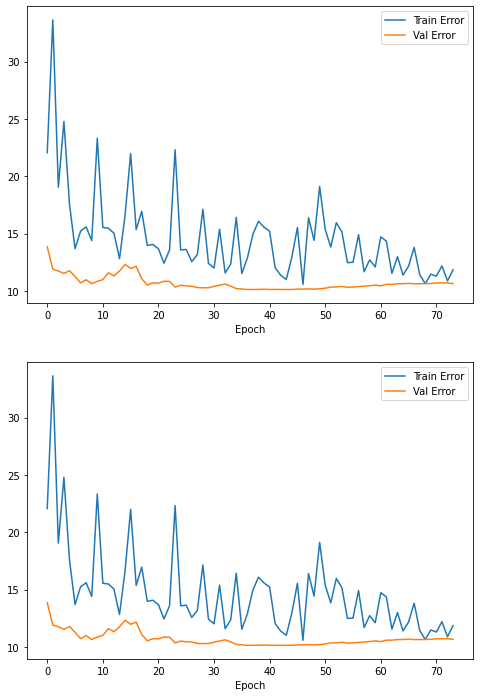

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.legend()
  plt.show()

plot_history(history)

In [14]:
test = pd.read_csv('./matrix_test.csv')
test.tail()

,Unnamed: 0,초시계,수호 천사,추적자의 팔목 보호대,존야의 모래시계,월식,악마의 포옹,얼어붙은 심장,필멸자의 운명,스테락의 도전,...,BEFORE_TOP,BEFORE_BOTTOM,BEFORE_MIDDLE,BEFORE_JUNGLE,BEFORE_UTILITY,TOP,BOTTOM,MIDDLE,JUNGLE,UTILITY
0,12.23,0,0,0,0,0,0,0,0,0,...,14.8,19.0,18.4,25.6,22.1,14.9,19.9,18.3,24.7,22.2


In [15]:
test_predictions = model.predict(test[['TOP','BOTTOM','MIDDLE','JUNGLE','UTILITY']]).flatten()
print(test_predictions.shape)

1/1 [==============================] - 0s 87ms/step
(1,)


In [16]:
mae = model.evaluate(X_test, y_test)
print(mae)

1/1 [==============================] - 0s 19ms/step - loss: 10.6496 - accuracy: 0.9717
[10.649643898010254, 0.9716981053352356]
